In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("blastchar/telco-customer-churn")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/telco-customer-churn


In [ ]:
import pandas as pd

df = pd.read_csv(path + "/WA_Fn-UseC_-Telco-Customer-Churn.csv")

df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
df.dtypes

,0
customerID,object
gender,object
SeniorCitizen,int64
Partner,object
Dependents,object
tenure,int64
PhoneService,object
MultipleLines,object
InternetService,object
OnlineSecurity,object


In [ ]:
import pandas as pd

# Load data (assuming it's already in df)
df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})

# Handle binary yes/no columns (map to 1/0)
binary_cols = ['Partner', 'Dependents', 'PhoneService', 'OnlineSecurity',
               'OnlineBackup', 'DeviceProtection', 'TechSupport',
               'StreamingTV', 'StreamingMovies']

for col in binary_cols:
    df[col] = df[col].map({'Yes': 1, 'No': 0}).fillna(0) # Fill NaN introduced by mapping with 0

# Handle "No internet/phone service" as 0
df['MultipleLines'] = df['MultipleLines'].replace({'No phone service': 'No'})
df['MultipleLines'] = df['MultipleLines'].map({'Yes': 1, 'No': 0})

# Internet service: DSL, Fiber optic, No → one-hot
# Contract, PaymentMethod, gender, PaperlessBilling → one-hot
df = pd.get_dummies(df, columns=['InternetService', 'Contract', 'PaymentMethod', 'gender', 'PaperlessBilling'], drop_first=True)

# Drop customerID
df.drop(['customerID'], axis=1, inplace=True)

In [ ]:
df.head()

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,...,Churn,InternetService_Fiber optic,InternetService_No,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,gender_Male,PaperlessBilling_Yes
0,0,1,0,1,0,0,0.0,1.0,0.0,0.0,...,0,False,False,False,False,False,True,False,False,True
1,0,0,0,34,1,0,1.0,0.0,1.0,0.0,...,0,False,False,True,False,False,False,True,True,False
2,0,0,0,2,1,0,1.0,1.0,0.0,0.0,...,1,False,False,False,False,False,False,True,True,True
3,0,0,0,45,0,0,1.0,0.0,1.0,1.0,...,0,False,False,True,False,False,False,False,True,False
4,0,0,0,2,1,0,0.0,0.0,0.0,0.0,...,1,True,False,False,False,False,True,False,False,True


In [ ]:
# First, find bad rows
bad_rows = df[df['TotalCharges'].str.strip() == ' ']
print("Blank TotalCharges rows:", bad_rows.shape)

# Convert column safely
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# Fill NaNs with median (or 0 if preferred)
df['TotalCharges'].fillna(df['TotalCharges'].median(), inplace=True)

# Double check
print(df['TotalCharges'].dtypes)


Blank TotalCharges rows: (0, 24)
float64


/tmp/ipython-input-6-856878435.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['TotalCharges'].fillna(df['TotalCharges'].median(), inplace=True)


In [ ]:
df.dtypes

,0
SeniorCitizen,int64
Partner,int64
Dependents,int64
tenure,int64
PhoneService,int64
MultipleLines,int64
OnlineSecurity,float64
OnlineBackup,float64
DeviceProtection,float64
TechSupport,float64


In [ ]:
from sklearn.model_selection import train_test_split

# Step 1: Define features (X) and target (y)
X = df.drop('Churn', axis=1)
y = df['Churn']

# Step 2: Split into train and test (80/20)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y  # stratify = keep churn ratio consistent
)

# Step 3: Confirm shape
print("Training set:", X_train.shape)
print("Test set:", X_test.shape)

Training set: (5634, 23)
Test set: (1409, 23)


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.metrics import roc_auc_score, f1_score, accuracy_score

# Fit and evaluate
baseline_auc = {}
baseline_f1 = {}
baseline_acc = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1]

    baseline_auc[name] = roc_auc_score(y_test, y_proba)
    baseline_f1[name] = f1_score(y_test, y_pred)
    baseline_acc[name] = accuracy_score(y_test, y_pred)

    print(f"{name} - Accuracy: {baseline_acc[name]:.3f}, ROC-AUC: {baseline_auc[name]:.3f}, F1 Score: {baseline_f1[name]:.3f}")


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression - Accuracy: 0.804, ROC-AUC: 0.843, F1 Score: 0.601
Random Forest - Accuracy: 0.789, ROC-AUC: 0.824, F1 Score: 0.557
KNN - Accuracy: 0.764, ROC-AUC: 0.754, F1 Score: 0.491
XGBoost - Accuracy: 0.786, ROC-AUC: 0.821, F1 Score: 0.571


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [08:01:26] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


In [ ]:
from sklearn.model_selection import GridSearchCV

# Logistic Regression
log_grid = GridSearchCV(
    LogisticRegression(max_iter=1000),
    param_grid={'C': [0.01, 0.1, 1, 10], 'solver': ['liblinear', 'lbfgs']},
    scoring='roc_auc',
    cv=5,
    n_jobs=-1
)

# Random Forest
rf_grid = GridSearchCV(
    RandomForestClassifier(),
    param_grid={'n_estimators': [100, 200], 'max_depth': [5, 10, None]},
    scoring='roc_auc',
    cv=5,
    n_jobs=-1
)

# KNN
knn_grid = GridSearchCV(
    KNeighborsClassifier(),
    param_grid={'n_neighbors': [3, 5, 7, 9]},
    scoring='roc_auc',
    cv=5,
    n_jobs=-1
)

# XGBoost
xgb_grid = GridSearchCV(
    XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42),
    param_grid={
        'n_estimators': [100, 200],
        'max_depth': [3, 5],
        'learning_rate': [0.01, 0.1]
    },
    scoring='roc_auc',
    cv=5,
    n_jobs=-1
)

# Fit all
log_grid.fit(X_train, y_train)
rf_grid.fit(X_train, y_train)
knn_grid.fit(X_train, y_train)
xgb_grid.fit(X_train, y_train)


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [07:14:27] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False,
                                     eval_metric='logloss', feature_types=None,
                                     feature_weights=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraint...
                                     learning_rate=None, max_bin=None,
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None, ...),
             n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.1], 'max_depth': [3, 5],
                         'n_estimators': [100, 200]},
             scoring='roc_auc')

In [ ]:
from sklearn.metrics import accuracy_score, roc_auc_score, f1_score

tuned_auc = {}
tuned_f1 = {}
tuned_acc = {}

for name, model in tuned_models.items():
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1]

    tuned_auc[name] = roc_auc_score(y_test, y_proba)
    tuned_f1[name] = f1_score(y_test, y_pred)
    tuned_acc[name] = accuracy_score(y_test, y_pred)

    print(f"{name} - Accuracy: {tuned_acc[name]:.3f}, ROC-AUC: {tuned_auc[name]:.3f}, F1 Score: {tuned_f1[name]:.3f}")

Logistic Regression (Tuned) - Accuracy: 0.803, ROC-AUC: 0.842, F1 Score: 0.599
Random Forest (Tuned) - Accuracy: 0.789, ROC-AUC: 0.845, F1 Score: 0.501
KNN (Tuned) - Accuracy: 0.789, ROC-AUC: 0.783, F1 Score: 0.522
XGBoost (Tuned) - Accuracy: 0.801, ROC-AUC: 0.846, F1 Score: 0.577


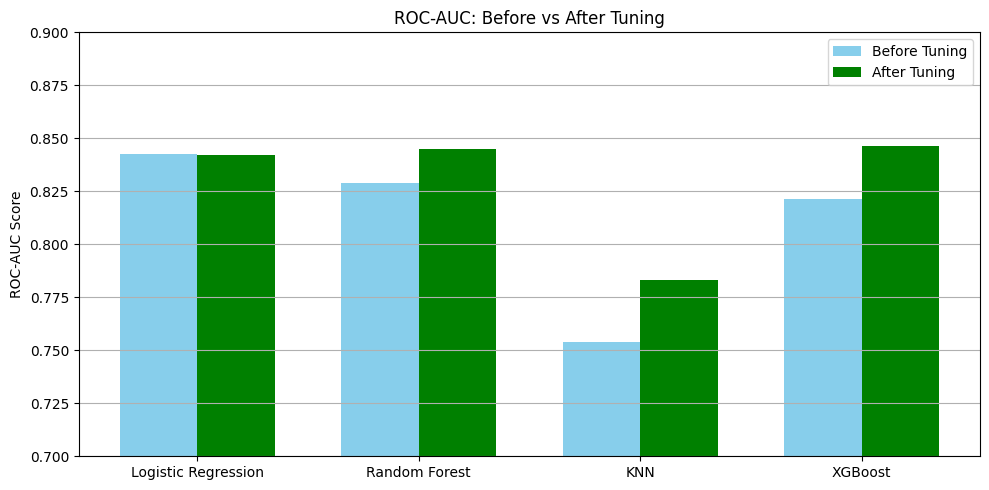

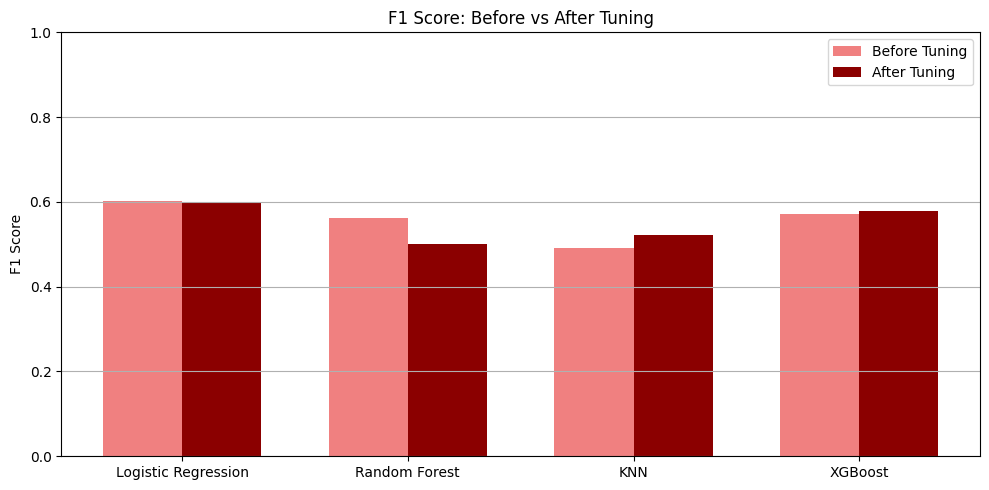

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

models_order = ["Logistic Regression", "Random Forest", "KNN", "XGBoost"]
x = np.arange(len(models_order))
bar_width = 0.35

# ROC-AUC Comparison
plt.figure(figsize=(10, 5))
plt.bar(x - bar_width/2, [baseline_auc[m] for m in models_order], width=bar_width, label='Before Tuning', color='skyblue')
plt.bar(x + bar_width/2, [tuned_auc[f"{m} (Tuned)"] for m in models_order], width=bar_width, label='After Tuning', color='green')
plt.xticks(x, models_order)
plt.ylim(0.7, 0.9)
plt.ylabel("ROC-AUC Score")
plt.title("ROC-AUC: Before vs After Tuning")
plt.legend()
plt.grid(axis='y')
plt.tight_layout()
plt.show()

# F1 Score Comparison
plt.figure(figsize=(10, 5))
plt.bar(x - bar_width/2, [baseline_f1[m] for m in models_order], width=bar_width, label='Before Tuning', color='lightcoral')
plt.bar(x + bar_width/2, [tuned_f1[f"{m} (Tuned)"] for m in models_order], width=bar_width, label='After Tuning', color='darkred')
plt.xticks(x, models_order)
plt.ylim(0, 1)
plt.ylabel("F1 Score")
plt.title("F1 Score: Before vs After Tuning")
plt.legend()
plt.grid(axis='y')
plt.tight_layout()
plt.show()


In [ ]:
!pip install optuna

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 395.9/395.9 kB 12.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 247.0/247.0 kB 20.2 MB/s eta 0:00:00


In [ ]:
import xgboost as xgb
import optuna
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split

# Make sure you've defined these beforehand
# X_train, X_test, y_train, y_test

# Convert to DMatrix
dtrain = xgb.DMatrix(X_train, label=y_train)
dvalid = xgb.DMatrix(X_test, label=y_test)

# 1. Define objective function
def objective(trial):
    param = {
        "objective": "binary:logistic",
        "booster": trial.suggest_categorical("booster", ["gbtree", "gblinear", "dart"]),
        "lambda": trial.suggest_float("lambda", 1e-8, 1.0, log=True),
        "alpha": trial.suggest_float("alpha", 1e-8, 1.0, log=True),
        "subsample": trial.suggest_float("subsample", 0.5, 1.0),
        "colsample_bytree": trial.suggest_float("colsample_bytree", 0.5, 1.0),
        "learning_rate": trial.suggest_float("learning_rate", 0.01, 0.3),
        "max_depth": trial.suggest_int("max_depth", 3, 10),
        "min_child_weight": trial.suggest_int("min_child_weight", 1, 10),
        "verbosity": 0,
        "eval_metric": "logloss"
    }

    # Train model
    bst = xgb.train(params=param, dtrain=dtrain, num_boost_round=100)

    # Predict
    preds_proba = bst.predict(dvalid)
    preds_binary = [1 if p > 0.5 else 0 for p in preds_proba]

    # Calculate F1 score
    return f1_score(y_test, preds_binary)

# 2. Run Optuna optimization
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=200)

# 3. Results
print("🏆 Best F1 Score:", study.best_value)
print("✅ Best Parameters:")
for key, value in study.best_params.items():
    print(f"  - {key}: {value}")


[I 2025-07-23 08:23:26,705] A new study created in memory with name: no-name-fd074b79-582e-4e3b-a1db-278e7769ff8f
[I 2025-07-23 08:23:28,429] Trial 0 finished with value: 0.5442834138486312 and parameters: {'booster': 'gbtree', 'lambda': 0.4731504811696379, 'alpha': 0.00039452746725701426, 'subsample': 0.6579797139546044, 'colsample_bytree': 0.9393270831213301, 'learning_rate': 0.02078198400678677, 'max_depth': 9, 'min_child_weight': 6}. Best is trial 0 with value: 0.5442834138486312.
[I 2025-07-23 08:23:29,660] Trial 1 finished with value: 0.5845697329376854 and parameters: {'booster': 'dart', 'lambda': 0.15449735023315841, 'alpha': 0.00032228118061977933, 'subsample': 0.8174986810480133, 'colsample_bytree': 0.9251712885582721, 'learning_rate': 0.07765617144480576, 'max_depth': 4, 'min_child_weight': 1}. Best is trial 1 with value: 0.5845697329376854.
[I 2025-07-23 08:23:31,579] Trial 2 finished with value: 0.5961251862891207 and parameters: {'booster': 'dart', 'lambda': 0.00020810590

🏆 Best F1 Score: 0.6192592592592593
✅ Best Parameters:
  - booster: dart
  - lambda: 3.853620850203382e-06
  - alpha: 0.8686830515723357
  - subsample: 0.5359012778997296
  - colsample_bytree: 0.9755792434788313
  - learning_rate: 0.04125312343409404
  - max_depth: 5
  - min_child_weight: 8


In [ ]:
# Train final model using best params
best_params = study.best_params

# Add required fixed parameters
best_params.update({
    "objective": "binary:logistic",
    "eval_metric": "logloss",
    "verbosity": 0
})

# Retrain on full training set
final_model = xgb.train(best_params, dtrain, num_boost_round=100)

# Predict on validation/test set
preds_proba = final_model.predict(dvalid)
preds = [1 if p > 0.5 else 0 for p in preds_proba]

# Evaluate
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score

acc = accuracy_score(y_test, preds)
f1 = f1_score(y_test, preds)
roc = roc_auc_score(y_test, preds_proba)

print("\n🎯 Final Model Evaluation on Validation Set")
print(f"✅ Accuracy:  {acc:.4f}")
print(f"✅ F1 Score:  {f1:.4f}")
print(f"✅ ROC-AUC:   {roc:.4f}")



🎯 Final Model Evaluation on Validation Set
✅ Accuracy:  0.8176
✅ F1 Score:  0.6193
✅ ROC-AUC:   0.8505


In [ ]:
# 1. Get the best hyperparameters
best_params = study.best_params

# 2. Add fixed parameters
best_params.update({
    "objective": "binary:logistic",
    "eval_metric": "logloss",
    "verbosity": 0
})

# 3. Retrain the model on full training data (you can also use full dataset if needed)
dtrain_full = xgb.DMatrix(X_train, label=y_train)
best_model = xgb.train(params=best_params, dtrain=dtrain_full, num_boost_round=200)

# 4. Save the trained model
best_model.save_model("xgb_churn_model.json")
print("✅ Model saved as 'xgb_churn_model.json'")


✅ Model saved as 'xgb_churn_model.json'


In [ ]:
# Load the model from file
loaded_model = xgb.Booster()
loaded_model.load_model("xgb_churn_model.json")

# Predict
dtest = xgb.DMatrix(X_test)
preds = loaded_model.predict(dtest)

In [ ]:
pip install optuna[visualization]

In [ ]:
import optuna.visualization as vis

vis.plot_optimization_history(study).show()

In [ ]:
vis.plot_param_importances(study).show()

In [ ]:
pip install shap

In [ ]:
import shap
import xgboost as xgb
import matplotlib.pyplot as plt

# Convert X_test to a DMatrix
dtest = xgb.DMatrix(X_test)

# Use your already loaded or trained model
explainer = shap.TreeExplainer(best_model)
shap_values = explainer.shap_values(X_test)

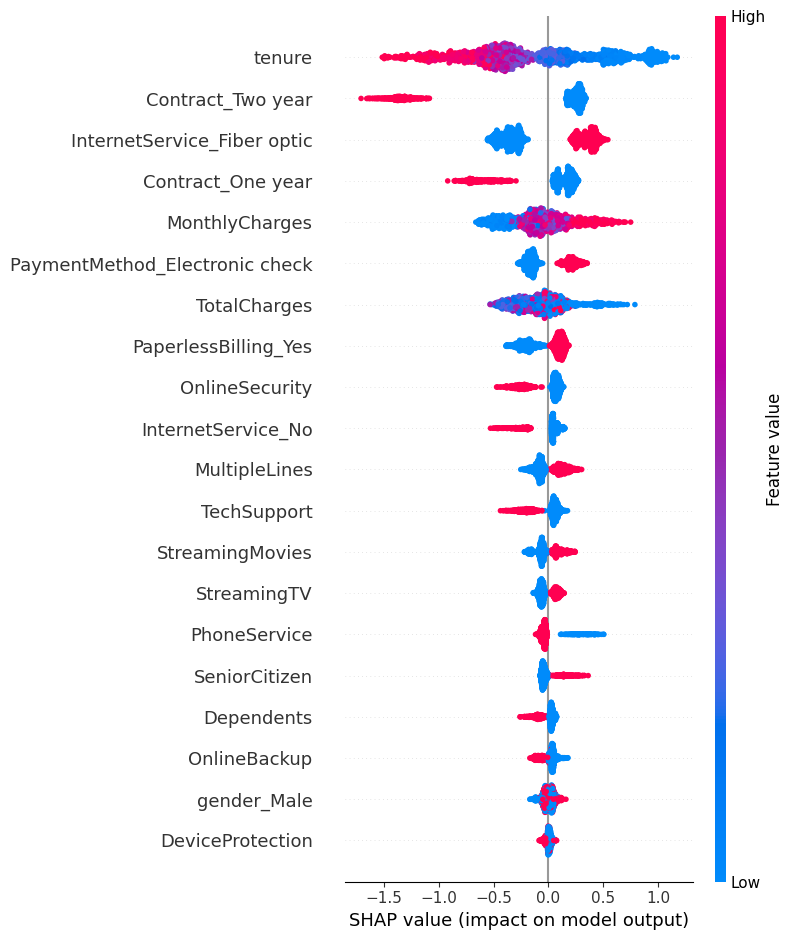

In [ ]:
shap.summary_plot(shap_values, X_test)

In [ ]:
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values[0], X_test.iloc[0])

/usr/local/lib/python3.11/dist-packages/xgboost/plotting.py:267: FutureWarning:

The `num_trees` parameter is deprecated, use `tree_idx` insetad. 



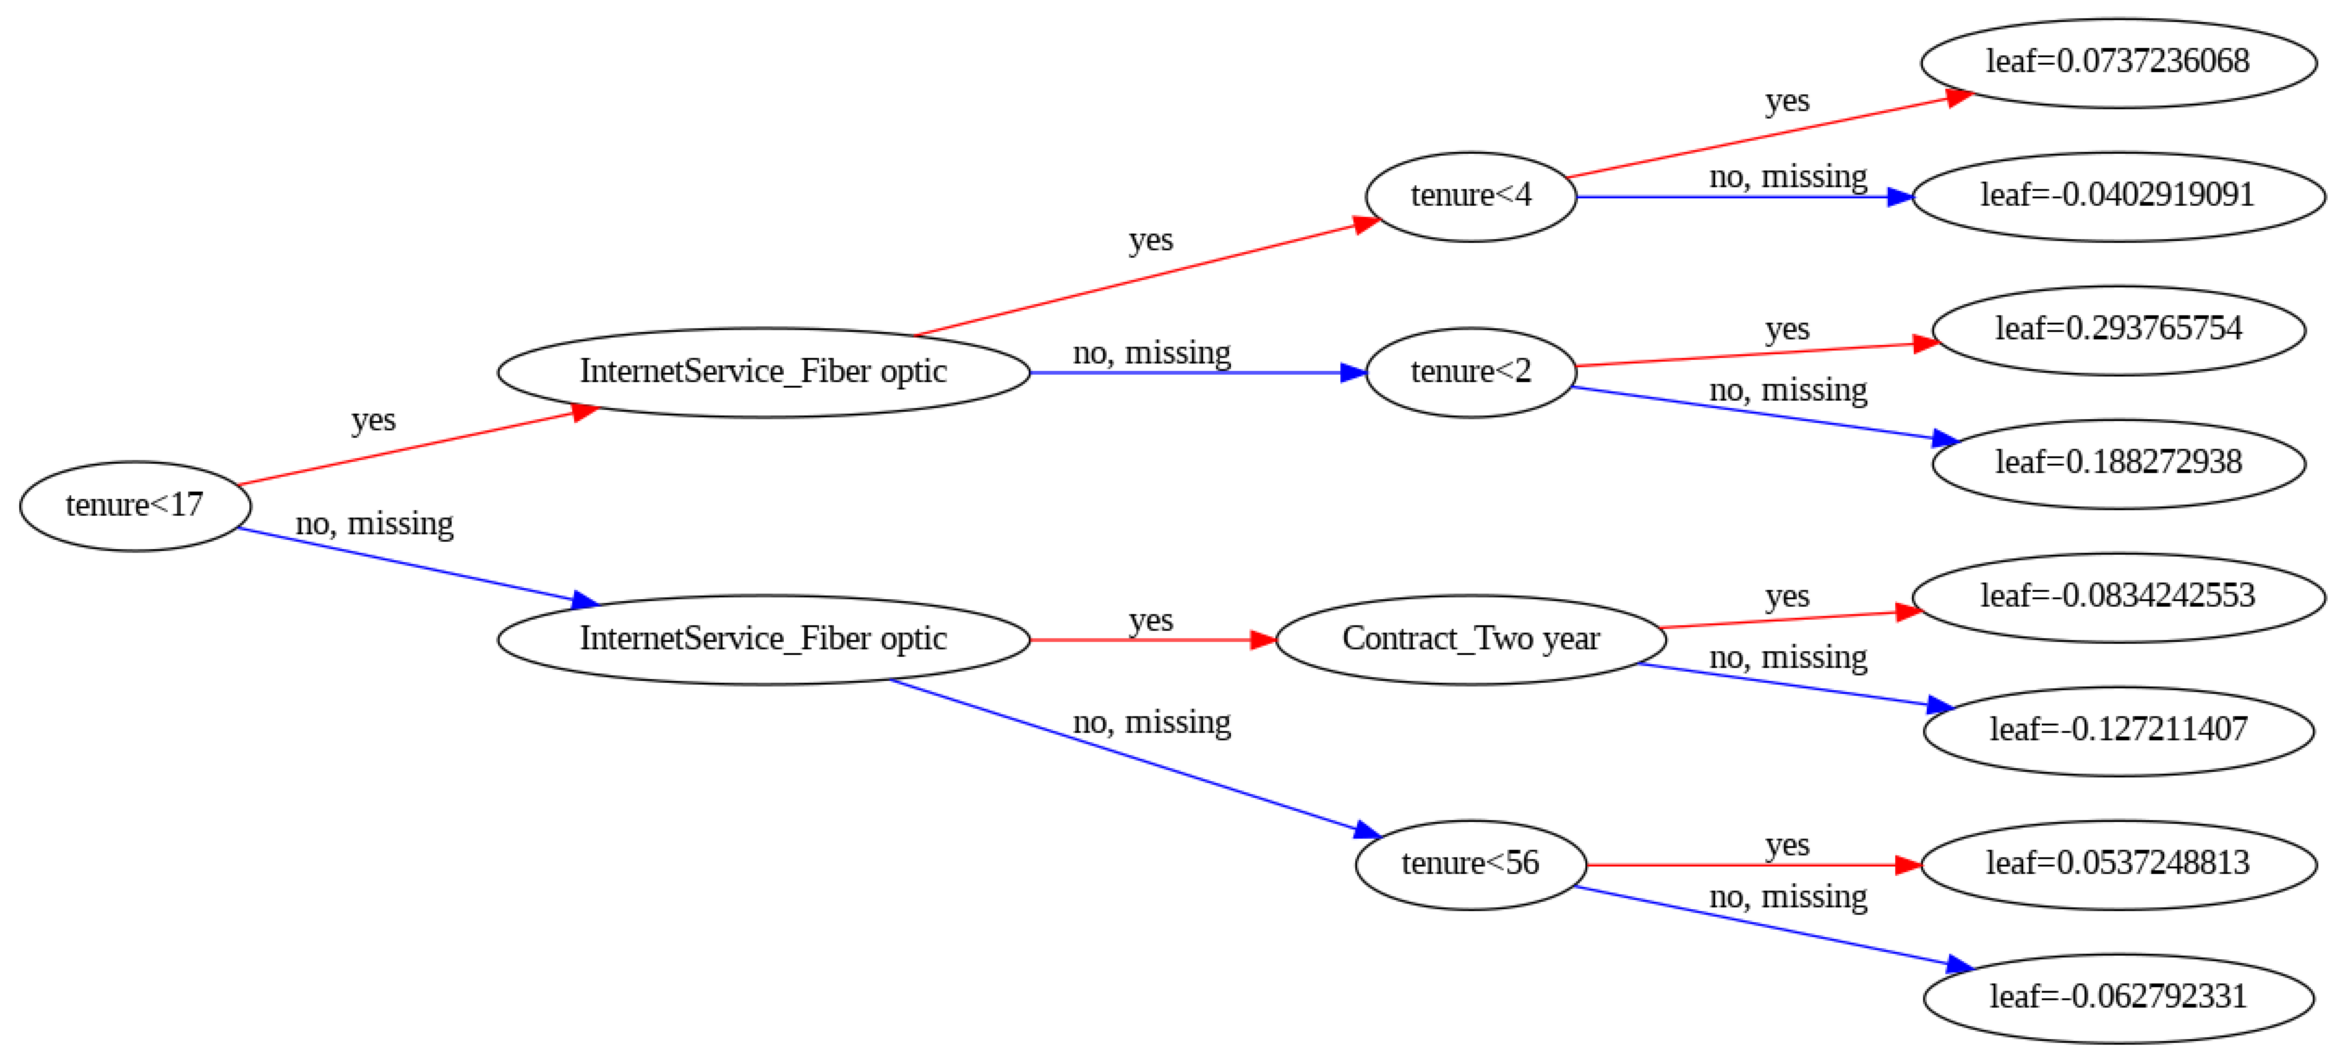

In [ ]:
import matplotlib.pyplot as plt
xgb.plot_tree(model, num_trees=0, rankdir='LR')
plt.rcParams['figure.figsize'] = [30, 15]
plt.show()